In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
salaryDataset = pd.read_csv("./datasets/salary.csv")

In [120]:
salaryDataset

,Age,YearsExperience,Salary,Gender,Classification,Job
0,22,1.1,39343,Female,Low,Assistant
1,22,1.3,46205,Male,TOP,Professor
2,23,1.5,37731,Female,TOP,Administrative
3,24,2.0,43525,Female,Medium,Assistant
4,25,2.2,39891,Male,Medium,Professor
5,26,2.9,56642,Male,Medium,Assistant
6,27,3.0,60150,Male,Low,Assistant
7,29,3.2,54445,Female,Medium,Professor
8,31,3.2,64445,Female,TOP,Professor
9,29,3.7,57189,Male,TOP,Professor


In [4]:
X = salaryDataset[['Age', 'YearsExperience', 'Gender', 'Classification', 'Job']]
X= pd.get_dummies (data=X, drop_first=True)
Y = salaryDataset[['Salary']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictionsTable = pd.DataFrame(predictions)
results = { 'MAE': mean_absolute_error(y_test, predictions),                      
            'RMSE': np.sqrt(mean_squared_error(y_test, predictions))}
dataset = pd.DataFrame (results, index=[0])

In [121]:
y_test

,Salary
18,81363
7,54445
20,91738
32,105582
30,105582
26,116969
25,105582
27,112635
33,116969
2,37731


In [122]:
predictionsTable

,0
0,80970.531584
1,54147.792302
2,84608.328418
3,112838.319948
4,111603.646954
5,121986.738656
6,111208.495235
7,125909.944039
8,112148.270923
9,43036.552732


In [55]:
y_testSorted = y_test.sort_values(by='Salary')

In [56]:
y_testSorted

,Salary
2,37731
3,43525
7,54445
10,63218
16,66029
18,81363
20,91738
19,93940
32,105582
30,105582


In [92]:

predSorted = predictionsTable.sort_values(by=0)
predSorted

,0
14,41918.810878
9,43036.552732
1,54147.792302
13,62820.758942
12,71270.939538
0,80970.531584
2,84608.328418
11,85930.918914
6,111208.495235
4,111603.646954


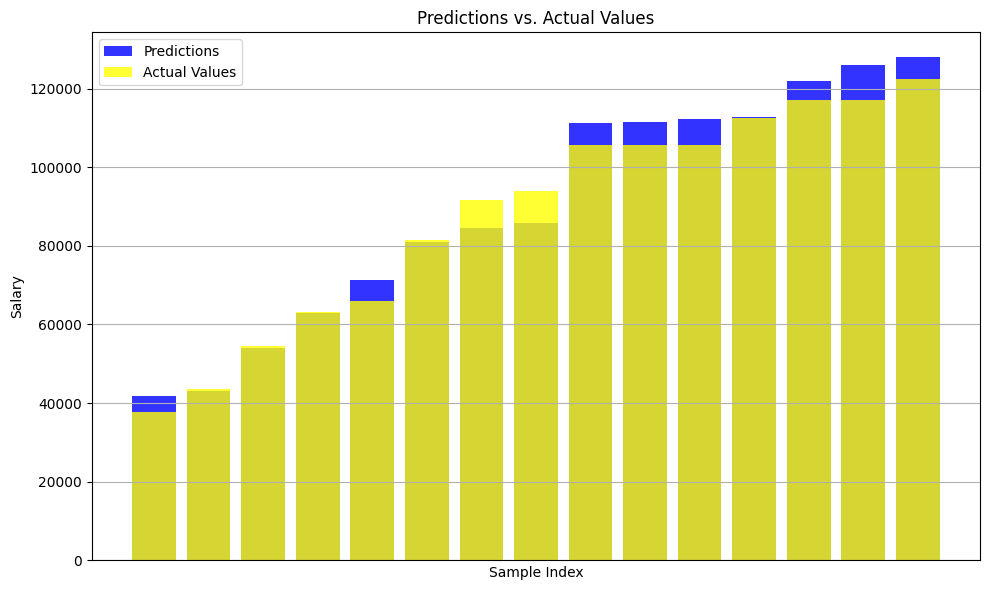

<module 'matplotlib.pyplot' from 'c:\\Users\\manue\\anaconda3\\envs\\powerbi\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [82]:

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot predictions as blue bars
plt.bar(range(len(y_test)), predSorted[0].values, label='Predictions', color='blue', alpha=0.8)

# Plot actual values (y_test) as red bars
plt.bar(range(len(y_test)), y_testSorted['Salary'].values, label='Actual Values', color='yellow', alpha=0.8)

# Set labels and title
plt.xlabel('Sample Index')
plt.ylabel('Salary')
plt.title('Predictions vs. Actual Values')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)  # Optional: Add gridlines for better readability
x_labels = predictionsTable[0].values

plt.xticks([])
plt.tight_layout()  # Adjust spacing between elements
plt.show()

plt

In [99]:
table_yTestPred = pd.DataFrame()
table_yTestPred['Test_Val'] = y_testSorted['Salary'].values
table_yTestPred['Predictions'] = predSorted[0].values
# columns=[y_testSorted['Salary'], predSorted[0]]
table_yTestPred

,Test_Val,Predictions
0,37731,41918.810878
1,43525,43036.552732
2,54445,54147.792302
3,63218,62820.758942
4,66029,71270.939538
5,81363,80970.531584
6,91738,84608.328418
7,93940,85930.918914
8,105582,111208.495235
9,105582,111603.646954


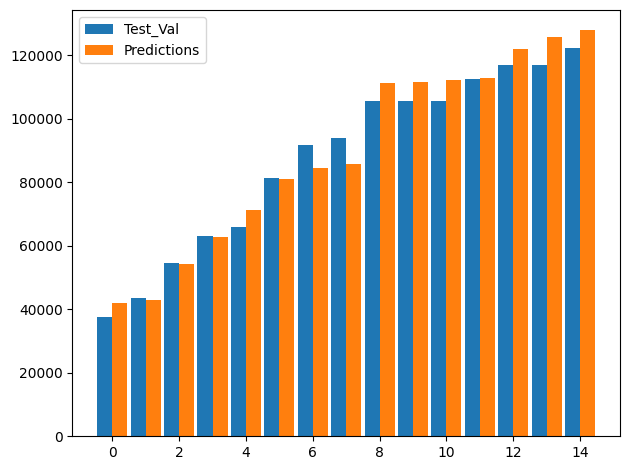

In [111]:
typ = table_yTestPred

x_axis = typ.index.to_numpy()

bar_width = 0.45
bar_positions_1 = x_axis - bar_width / 2
bar_positions_2 = x_axis + bar_width / 2

plt.bar(bar_positions_1, typ['Test_Val'], bar_width, label=typ.columns[0]) 
plt.bar(bar_positions_2, typ['Predictions'], bar_width, label=typ.columns[1])

plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

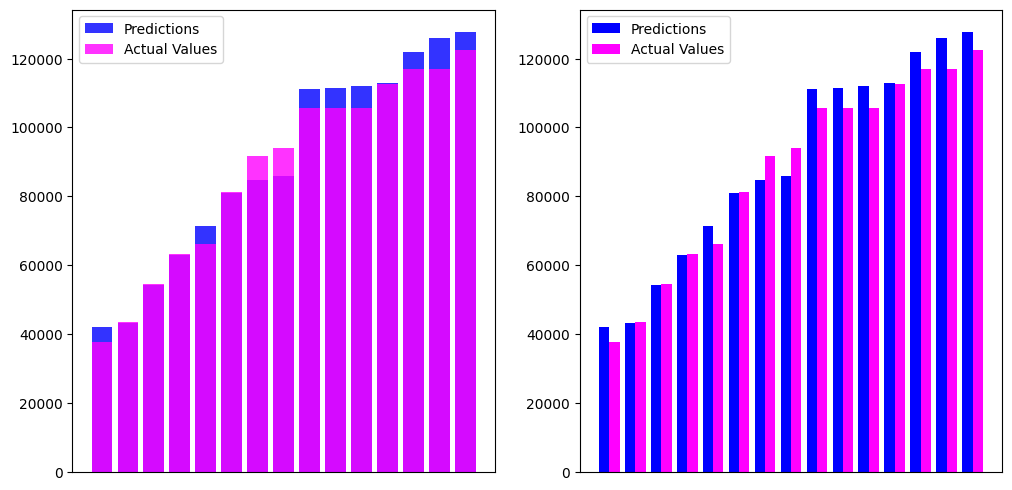

In [119]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))

ax1.bar(range(len(y_test)), predSorted[0].values, label='Predictions', color='blue', alpha=0.8)
ax1.bar(range(len(y_test)), y_testSorted['Salary'].values, label='Actual Values', color='magenta', alpha=0.8)
ax1.set_xticks([])
ax1.legend()

x_axis = typ.index.to_numpy()

bar_width = 0.4
bar_positions_1 = x_axis - bar_width / 2
bar_positions_2 = x_axis + bar_width / 2

ax2.bar(bar_positions_1, typ['Predictions'], bar_width, label='Predictions', color = 'blue')
ax2.bar(bar_positions_2, typ['Test_Val'], bar_width, label='Actual Values', color = 'magenta')
ax2.set_xticks([])
ax2.legend()

In [ ]:
table_yTestPred2 = pd.DataFrame()
table_yTestPred2['Test_Val'] = y_test['Salary'].values
table_yTestPred2['Predictions'] = predictionsTable[0].values
# columns=[y_testSorted['Salary'], predSorted[0]]
table_yTestPred2

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))

ax1.bar(range(len(y_test)), predictionsTable[0].values, label='Predictions', color='blue', alpha=0.8)
ax1.bar(range(len(y_test)), y_test['Salary'].values, label='Actual Values', color='magenta', alpha=0.8)
ax1.set_xticks([])
ax1.legend()

x_axis = typ.index.to_numpy()

typ2 = table_yTestPred2

bar_width = 0.4
bar_positions_1 = x_axis - bar_width / 2
bar_positions_2 = x_axis + bar_width / 2

ax2.bar(bar_positions_1, typ2['Predictions'], bar_width, label='Predictions', color = 'blue')
ax2.bar(bar_positions_2, typ2['Test_Val'], bar_width, label='Actual Values', color = 'magenta')
ax2.set_xticks([])
ax2.legend()